In [238]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [239]:
X_train = pd.read_csv('data/train.csv', index_col='PassengerId')
X_test = pd.read_csv('data/test.csv', index_col='PassengerId')
twix = (X_train, X_test)
X_train.sample(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
728,1,3,"Mannion, Miss. Margareth",female,NaN,0,0,36866,7.7375,NaN,Q
743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
821,1,1,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",female,52.0,1,1,12749,93.5000,B69,S
84,0,1,"Carrau, Mr. Francisco M",male,28.0,0,0,113059,47.1000,NaN,S
390,1,2,"Lehmann, Miss. Bertha",female,17.0,0,0,SC 1748,12.0000,NaN,C


In [240]:
X_test.sample(5)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
1104,2,"Deacon, Mr. Percy William",male,17.0,0,0,S.O.C. 14879,73.5000,NaN,S
1297,2,"Nourney, Mr. Alfred (Baron von Drachstedt"")""",male,20.0,0,0,SC/PARIS 2166,13.8625,D38,C
1108,3,"Mahon, Miss. Bridget Delia",female,NaN,0,0,330924,7.8792,NaN,Q
938,1,"Chevre, Mr. Paul Romaine",male,45.0,0,0,PC 17594,29.7000,A9,C


In [241]:
X_train.info()
print('-' * 40)
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 n

In [242]:
def compute_ticket(ticket):
    ticket = ticket.split()
    return ticket[0] if len(ticket) > 1 else None
for X in twix:
    X["label"] = X.Ticket.apply(compute_ticket)

In [243]:
for X in twix:
    X.loc[(X.label == 'C.A.') | (X.label == 'CA.') | (X.label == 'CA') | (X.label == 'C.A./SOTON'), 'label'] = 'CA'

In [244]:
for X in twix:
    X.loc[(X.label == 'STON/O') | (X.label == 'SOTON/O.Q.') | (X.label == 'SOTON/OQ') | (X.label == 'STON/O2.') | (X.label == 'SOTON/O2'), 'label'] = 'SOTON'

In [245]:
for X in twix:
    X.loc[(X.label == 'A/5.') | (X.label == 'A./5.') | (X.label == 'A.5.'), 'label'] = 'A/5'

In [246]:
for X in twix:
    X.loc[(X.label == 'W./C.'), 'label'] = 'W/C'

In [247]:
for X in twix:
    X.loc[(X.label == 'SC/Paris') | (X.label == 'S.C./PARIS') | (X.label == 'SC/AH') | (X.label == 'SC'), 'label'] = 'SC/PARIS'

In [248]:
for X in twix:
    X.loc[(X.label == 'A/4.') | (X.label == 'A4.') | (X.label == 'A/4'), 'label'] = 'A/5'

In [249]:
for X in twix:
    X.loc[(X.label != 'CA') & (X.label != 'SOTON') & (X.label != 'A/5') & (X.label != 'W/C') & (X.label != 'SC/PARIS') & (~X.label.isna()), 'label'] = 'rare'

<Axes: xlabel='label', ylabel='count'>

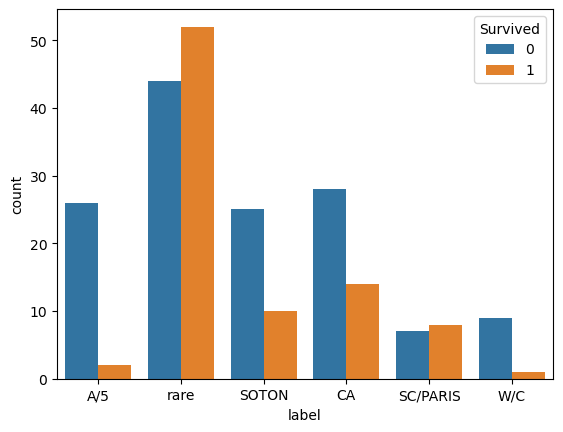

In [250]:
sns.countplot(data=X_train, x='label', hue='Survived')

In [251]:
for X in twix:
    X.label = X.label.fillna('none')
X_train.label.value_counts()

none        665
rare         96
CA           42
SOTON        35
A/5          28
SC/PARIS     15
W/C          10
Name: label, dtype: int64

In [252]:
for X in twix:
     X.drop(['Ticket'], axis=1, inplace=True)

In [253]:
for X in twix:
    X.Cabin.fillna('none', inplace=True)
    X['cabin_type'] = X['Cabin'].apply(lambda cabin: cabin[0])

In [254]:
X_train.query("cabin_type != 'n'")

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,label,cabin_type
PassengerId,,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,rare,C
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,none,C
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,E46,S,none,E
11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,16.7000,G6,S,rare,G
12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,26.5500,C103,S,none,C
...,...,...,...,...,...,...,...,...,...,...,...,...
872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,52.5542,D35,S,none,D
873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,5.0000,B51 B53 B55,S,none,B
880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,83.1583,C50,C,none,C


<Axes: xlabel='cabin_type', ylabel='count'>

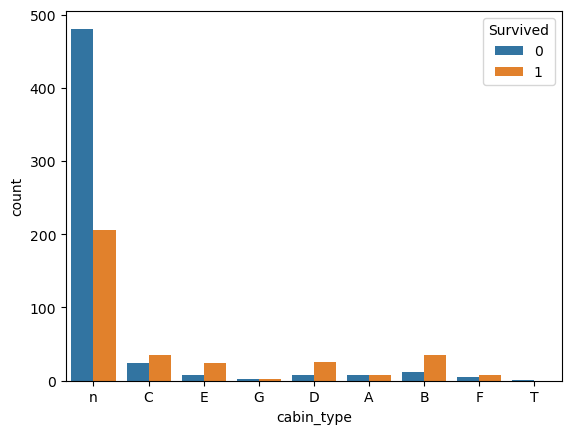

In [255]:
sns.countplot(data=X_train, x='cabin_type', hue='Survived')

In [256]:
X_train.loc[X_train.cabin_type == 'T', 'cabin_type'] = 'n'

In [257]:
for X in twix:
     X.drop(['Cabin'], axis=1, inplace=True)

In [258]:
for X in twix:
    X['status'] = X.Name.str.extract('([a-zA-Z]+)\.', expand=False)
pd.crosstab(X_train.status, X_train.Survived)

Survived,0,1
status,,
Capt,1,0
Col,1,1
Countess,0,1
Don,1,0
Dr,4,3
Jonkheer,1,0
Lady,0,1
Major,1,1
Master,17,23


In [262]:
for X in twix:
    X['status'] = X['status'].replace(['Don', 'Sir', 'Capt', 'Col', 'Dr', 'Jonkheer', 'Major', 'Rev', 'Sir'], 'Mr')
    X['status'] = X['status'].replace(['Mlle', 'Ms', 'Mme', 'Lady', 'Countess', 'Dona'], 'Mrs')

In [263]:
X_train[['status', 'Survived']].groupby(['status'], as_index=False).mean()

,status,Survived
0,Master,0.575000
1,Miss,0.697802
2,Mr,0.161710
3,Mrs,0.801527


In [264]:
X_test.groupby('status').Pclass.mean()

status
Master    2.714286
Miss      2.435897
Mr        2.302041
Mrs       1.837838
Name: Pclass, dtype: float64

In [265]:
for X in twix:
    X.drop('Name', axis=1, inplace=True)

In [266]:
X_train.sample()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,label,cabin_type,status
PassengerId,,,,,,,,,,,
299,1,1,male,NaN,0,0,30.5,S,none,C,Mr


In [267]:
for X in twix:
    X['Sex'] = X.Sex.map({'female': 1, 'male': 0})
X_train.sample()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,label,cabin_type,status
PassengerId,,,,,,,,,,,
548,1,2,0,NaN,0,0,13.8625,C,SC/PARIS,n,Mr


In [268]:
X_train.groupby(['Sex', 'Pclass']).Age.median()

Sex  Pclass
0    1         40.0
     2         30.0
     3         25.0
1    1         35.0
     2         28.0
     3         21.5
Name: Age, dtype: float64

In [269]:
for X in twix:
    for index, value in X.groupby(['Sex', 'Pclass']).Age.median().items():
        X.loc[(X['Sex'] == index[0]) & (X['Pclass'] == index[1]) & (X.Age.isna()), 'Age'] = value

In [270]:
X_train['age_group'] = pd.cut(X_train.Age, 5)
intervals = list(X_train[['age_group', 'Survived']].groupby(['age_group']).mean().index)
for i, interval in enumerate(intervals):
    for X in twix:
        X.loc[(X['Age'] >= int(interval.left)) & (X['Age'] <= int(interval.right)), 'Age'] = i

In [271]:
for X in twix:
    X.Age = X.Age.astype(np.int32)

In [272]:
X_train.query('Age == 0')

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,label,cabin_type,status,age_group
PassengerId,,,,,,,,,,,,
8,0,3,0,0,3,1,21.0750,S,none,n,Master,"(0.34, 16.336]"
10,1,2,1,0,1,0,30.0708,C,none,n,Mrs,"(0.34, 16.336]"
11,1,3,1,0,1,1,16.7000,S,rare,G,Miss,"(0.34, 16.336]"
15,0,3,1,0,0,0,7.8542,S,none,n,Miss,"(0.34, 16.336]"
17,0,3,0,0,4,1,29.1250,Q,none,n,Master,"(0.34, 16.336]"
...,...,...,...,...,...,...,...,...,...,...,...,...
851,0,3,0,0,4,2,31.2750,S,none,n,Master,"(0.34, 16.336]"
853,0,3,1,0,1,1,15.2458,C,none,n,Miss,"(0.34, 16.336]"
854,1,1,1,0,0,1,39.4000,S,rare,D,Miss,"(0.34, 16.336]"


In [273]:
X_train.drop('age_group', axis=1, inplace=True)

In [274]:
for X in twix:
    X['family_size'] = X['SibSp'] + X['Parch'] + 1
    
(X_train[['family_size', 'Survived']].groupby('family_size', as_index=False)
 .mean().sort_values(by='Survived', ascending=False))

,family_size,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [275]:
for X in twix:
    X['is_alone'] = np.where(X.family_size == 1, 1, 0)
X_train.groupby('is_alone').Survived.mean()

is_alone
0    0.505650
1    0.303538
Name: Survived, dtype: float64

In [276]:
for X in twix:
    X.drop(['Parch', 'SibSp', 'family_size'], axis=1, inplace=True)
X_train.sample()

,Survived,Pclass,Sex,Age,Fare,Embarked,label,cabin_type,status,is_alone
PassengerId,,,,,,,,,,
618,0,3,1,1,16.1,S,A/5,n,Mrs,0


In [277]:
for X in twix:
    X['age*class'] = X['Age'] * X['Pclass']
X_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,label,cabin_type,status,is_alone,age*class
PassengerId,,,,,,,,,,,
1,0,3,0,1,7.2500,S,A/5,n,Mr,0,3
2,1,1,1,2,71.2833,C,rare,C,Mrs,0,2
3,1,3,1,1,7.9250,S,SOTON,n,Miss,1,3
4,1,1,1,2,53.1000,S,none,C,Mrs,0,2
5,0,3,0,2,8.0500,S,none,n,Mr,1,6


In [278]:
port_mode = X_train.Embarked.mode()[0]

In [279]:
for X in twix:
    X['Embarked'] = X['Embarked'].fillna(port_mode)

In [280]:
X_train.groupby('Embarked').Survived.mean()

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

In [281]:
for X in twix:
    X['Embarked'] = X['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
X_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,label,cabin_type,status,is_alone,age*class
PassengerId,,,,,,,,,,,
1,0,3,0,1,7.2500,0,A/5,n,Mr,0,3
2,1,1,1,2,71.2833,1,rare,C,Mrs,0,2
3,1,3,1,1,7.9250,0,SOTON,n,Miss,1,3
4,1,1,1,2,53.1000,0,none,C,Mrs,0,2
5,0,3,0,2,8.0500,0,none,n,Mr,1,6


In [282]:
X_test.Fare.fillna(X_test.Fare.median(), inplace=True)

In [283]:
X_train['fare_group'] = pd.qcut(X_train.Fare, 4)
intervals = list(X_train.groupby('fare_group').Survived.mean().index)
for X in twix:
    for i, interval in enumerate(intervals):
        X.loc[(X['Fare'] >= interval.left) & (X['Fare'] <= interval.right), 'Fare'] = i

In [284]:
for X in twix:
    X.loc[X.Fare == X.Fare.max(), 'Fare'] = 3

In [285]:
X_train.drop('fare_group', axis=1, inplace=True)

In [286]:
X_test.status.fillna(3, inplace=True)

In [287]:
for X in twix:
    X.Fare = X.Fare.astype(np.int32)

In [288]:
X_train.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,label,cabin_type,status,is_alone,age*class
PassengerId,,,,,,,,,,,
1,0,3,0,1,0,0,A/5,n,Mr,0,3
2,1,1,1,2,3,1,rare,C,Mrs,0,2
3,1,3,1,1,1,0,SOTON,n,Miss,1,3
4,1,1,1,2,3,0,none,C,Mrs,0,2
5,0,3,0,2,1,0,none,n,Mr,1,6
6,0,3,0,1,1,2,none,n,Mr,1,3
7,0,1,0,3,3,0,none,E,Mr,1,3
8,0,3,0,0,2,0,none,n,Master,0,0
9,1,3,1,1,1,0,none,n,Mrs,0,3


In [289]:
X_test.head(10)

,Pclass,Sex,Age,Fare,Embarked,label,cabin_type,status,is_alone,age*class
PassengerId,,,,,,,,,,
892,3,0,2,0,2,none,n,Mr,1,6
893,3,1,2,0,0,none,n,Mrs,0,6
894,2,0,3,1,2,none,n,Mr,1,6
895,3,0,1,1,0,none,n,Mr,1,3
896,3,1,1,1,0,none,n,Mrs,0,3
897,3,0,0,1,0,none,n,Mr,1,0
898,3,1,1,0,2,none,n,Miss,1,3
899,2,0,1,2,0,none,n,Mr,0,2
900,3,1,1,0,1,none,n,Mrs,1,3


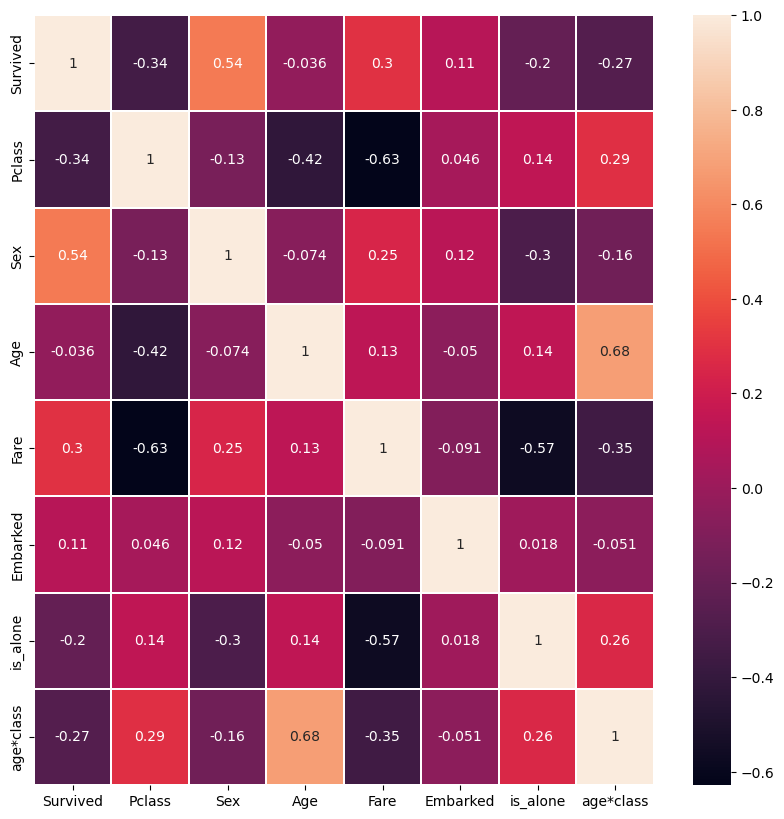

In [290]:
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(X_train.corr(numeric_only=True),annot=True,linewidths=.1)
plt.show()

In [291]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

In [292]:
X_train

,Survived,Pclass,Sex,Age,Fare,Embarked,is_alone,age*class,label_CA,label_SC/PARIS,...,cabin_type_B,cabin_type_C,cabin_type_D,cabin_type_E,cabin_type_F,cabin_type_G,cabin_type_n,status_Miss,status_Mr,status_Mrs
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,3,0,1,0,0,0,3,0,0,...,0,0,0,0,0,0,1,0,1,0
2,1,1,1,2,3,1,0,2,0,0,...,0,1,0,0,0,0,0,0,0,1
3,1,3,1,1,1,0,1,3,0,0,...,0,0,0,0,0,0,1,1,0,0
4,1,1,1,2,3,0,0,2,0,0,...,0,1,0,0,0,0,0,0,0,1
5,0,3,0,2,1,0,1,6,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,0,1,1,0,1,2,0,0,...,0,0,0,0,0,0,1,0,1,0
888,1,1,1,1,2,0,1,1,0,0,...,1,0,0,0,0,0,0,1,0,0
889,0,3,1,1,2,0,0,3,0,0,...,0,0,0,0,0,0,1,1,0,0


In [293]:
X_train.to_csv("data/X_train.csv")
X_test.to_csv("data/X_test.csv")